# **Assignment 1**
# **Brain stroke prediction**
# MIMUW XAI WINTER 2022/2023

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
df = pd.read_csv ("brain_stroke.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


Dataset consists of features that are nonnumerical. Let's  hot encode them first.

In [201]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

features_2_one_hot = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

transformer = make_column_transformer(
    (OneHotEncoder(), features_2_one_hot),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
df_one_hot = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)
df_one_hot

,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__ever_married_No,onehotencoder__ever_married_Yes,onehotencoder__work_type_Govt_job,onehotencoder__work_type_Private,onehotencoder__work_type_Self-employed,onehotencoder__work_type_children,onehotencoder__Residence_type_Rural,onehotencoder__Residence_type_Urban,onehotencoder__smoking_status_Unknown,onehotencoder__smoking_status_formerly smoked,onehotencoder__smoking_status_never smoked,onehotencoder__smoking_status_smokes,remainder__age,remainder__hypertension,remainder__heart_disease,remainder__avg_glucose_level,remainder__bmi,remainder__stroke
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,228.69,36.6,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,105.92,32.5,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,49.0,0.0,0.0,171.23,34.4,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,174.12,24.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,81.0,0.0,0.0,186.21,29.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,41.0,0.0,0.0,70.15,29.8,0.0
4977,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,40.0,0.0,0.0,191.15,31.1,0.0
4978,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,45.0,1.0,0.0,95.02,31.8,0.0
4979,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,40.0,0.0,0.0,83.94,30.0,0.0


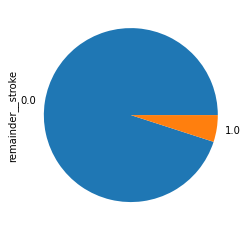

In [202]:
df_one_hot.groupby('remainder__stroke')['remainder__stroke'].count().plot(kind='pie')

Samples are unbalanced.

Preparing train and test samples with data balancing.

---



In [203]:
X = df_one_hot.drop("remainder__stroke", axis=1)
y = df_one_hot.remainder__stroke
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(X_resampled.shape, y_resampled.shape)
X_train, X_test, y_train, y_test =train_test_split( X_resampled, y_resampled, test_size=0.2, random_state=42)

(9466, 19) (9466,)


In [204]:
models = [ 
    LogisticRegression( max_iter=1234, random_state = 42).fit(X_train, y_train),
    RandomForestClassifier(max_depth=3, random_state=42).fit(X_train, y_train),
    XGBClassifier()
  ]

In [205]:
accuracies = []
for model in models:
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  accuracy = accuracy_score(pred,y_test)
  accuracies.append(accuracy)

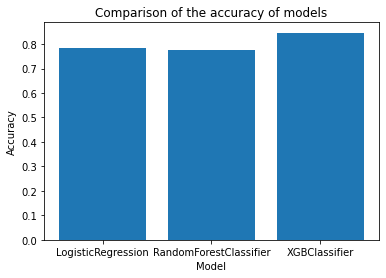

In [206]:
import matplotlib.pyplot as plt
   
model_name = ['LogisticRegression','RandomForestClassifier','XGBClassifier']

plt.bar(model_name, accuracies)
plt.title('Comparison of the accuracy of models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

Best accuracy 84,6% achieved XGBClassifier.